In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
%matplotlib inline
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


In [3]:
data = pd.read_csv("voice-classification.csv", sep=',')

feature_columns = ['meanfreq','sd','median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'mode',
                    'sp.ent','sfm','centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom','dfrange','modindx']
cleanup_nums = {"label":{"male": 1, "female": 0}}
data.replace(cleanup_nums, inplace=True)

X = data[feature_columns]
y = data['label']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
number_of_features = len(feature_columns)


In [10]:
from sknn import ae, mlp

AELayers = [
    ae.Layer("Tanh", units=number_of_features),
    ae.Layer("Tanh", units=1),
    ae.Layer("Tanh", units=8)
]

myae = ae.AutoEncoder(layers=AELayers)
myae.fit(X_scaled)
new_X = myae.transform(X_scaled)

ImportError: cannot import name 'downsample' from 'theano.tensor.signal' (C:\Users\Balkrishna\Anaconda3\lib\site-packages\theano\tensor\signal\__init__.py)

# Neural Net Learning Curves w/ Features created by:
## PCA, ICA, RP, AE

In [12]:
from sklearn.model_selection import learning_curve
import numpy as np

[1.         1.         0.99980855 0.99855072 0.99719298]
[0.5        0.5        0.76312196 0.94796991 0.94890534]


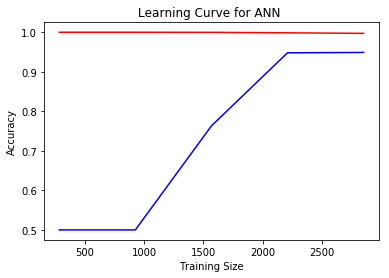

In [13]:
pca = PCA(n_components=9).fit(X_scaled)
features = pca.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)


mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN ")
plt.show()

In [14]:
ica = FastICA(n_components=8).fit(X_scaled)
features = ica.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN ")
plt.show()

NameError: name 'FastICA' is not defined